# Import Required Libraries

In [111]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, classification_report


# Dataset Dictionary

In [112]:
# age: age of a person
# job: type of job
# marital: marital status
# education
# default: has credit in default? ('no','yes','unknown')
# balance: average yearly balance
# housing: has housing loan? ('no','yes','unknown')
# loan: has personal loanduration ? ('no','yes','unknown')
# contact: contact communication type ('cellular','telephone')
# day: The day of the month when the contact was last made. 
# month: The month of the year when the last contact was made.
# duration: The duration of the last contact in seconds.
# campaign: The number of contacts performed during the campaign for the individual.
# pdays: The number of days that passed after the last contact from a previous campaign. A value of -1 indicates that the 
# individual was not previously contacted.
# previous: The number of contacts performed before this campaign for the individual.
# poutcome: The outcome of the previous marketing campaign (e.g. success, failure, others)
    
# The aim of the project is to predict if the client will subscribe (yes/no) to a term deposit. 
# This is a classification model, because the target variable is categorical. 
# We can apply Logistic, Decision Tree, Random Forest etc for this data set.

# Load and understand the dataset

In [113]:
df = pd.read_csv(r"Bank Data.csv")

In [114]:
# Check the dimension of the dataset
df.shape

(11162, 17)

In [115]:
# List the columns of the data
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [116]:
# Check the first few rows of data to study the values and information per column
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [117]:
# Get the statistical summary of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [118]:
# check the column wise information about non null value counts and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [119]:
# Find the null counts in the data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [120]:
# Check for duplicates
df.duplicated().sum()

0

In [121]:
# Check the target column : Identify if numerical or categorical.  
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

# Key Insights about data: 

In [122]:
# Number of Rows : 11162
# Number of columns : 17
# No duplicate values found
# No null / missing values found
# Target label is : deposit
# Target is categorical(yes/no). 
# Target output distribution is balanced
# Type of the probelm  : Classification


In [123]:
# check the unique values in column <contact>

df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [124]:
# Contact column is redundant. As medium of contact has no impact on customer's decision towards the Deposit Scheme.
# Drop the redundant column

df.drop('contact', axis = 1, inplace = True)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


# Visualisations

In [126]:
# Get the list of categorical columns' names. Will be helpful for making visuals 

category_col = df.select_dtypes(include = ['object']).columns.tolist()
category_col.remove('deposit')  # remove the target column name
category_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'month',
 'poutcome']

In [127]:
# Get the list of all numerical/continuous columns.

cont_col = df.select_dtypes(include = ['int']).columns.tolist()
cont_col


['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

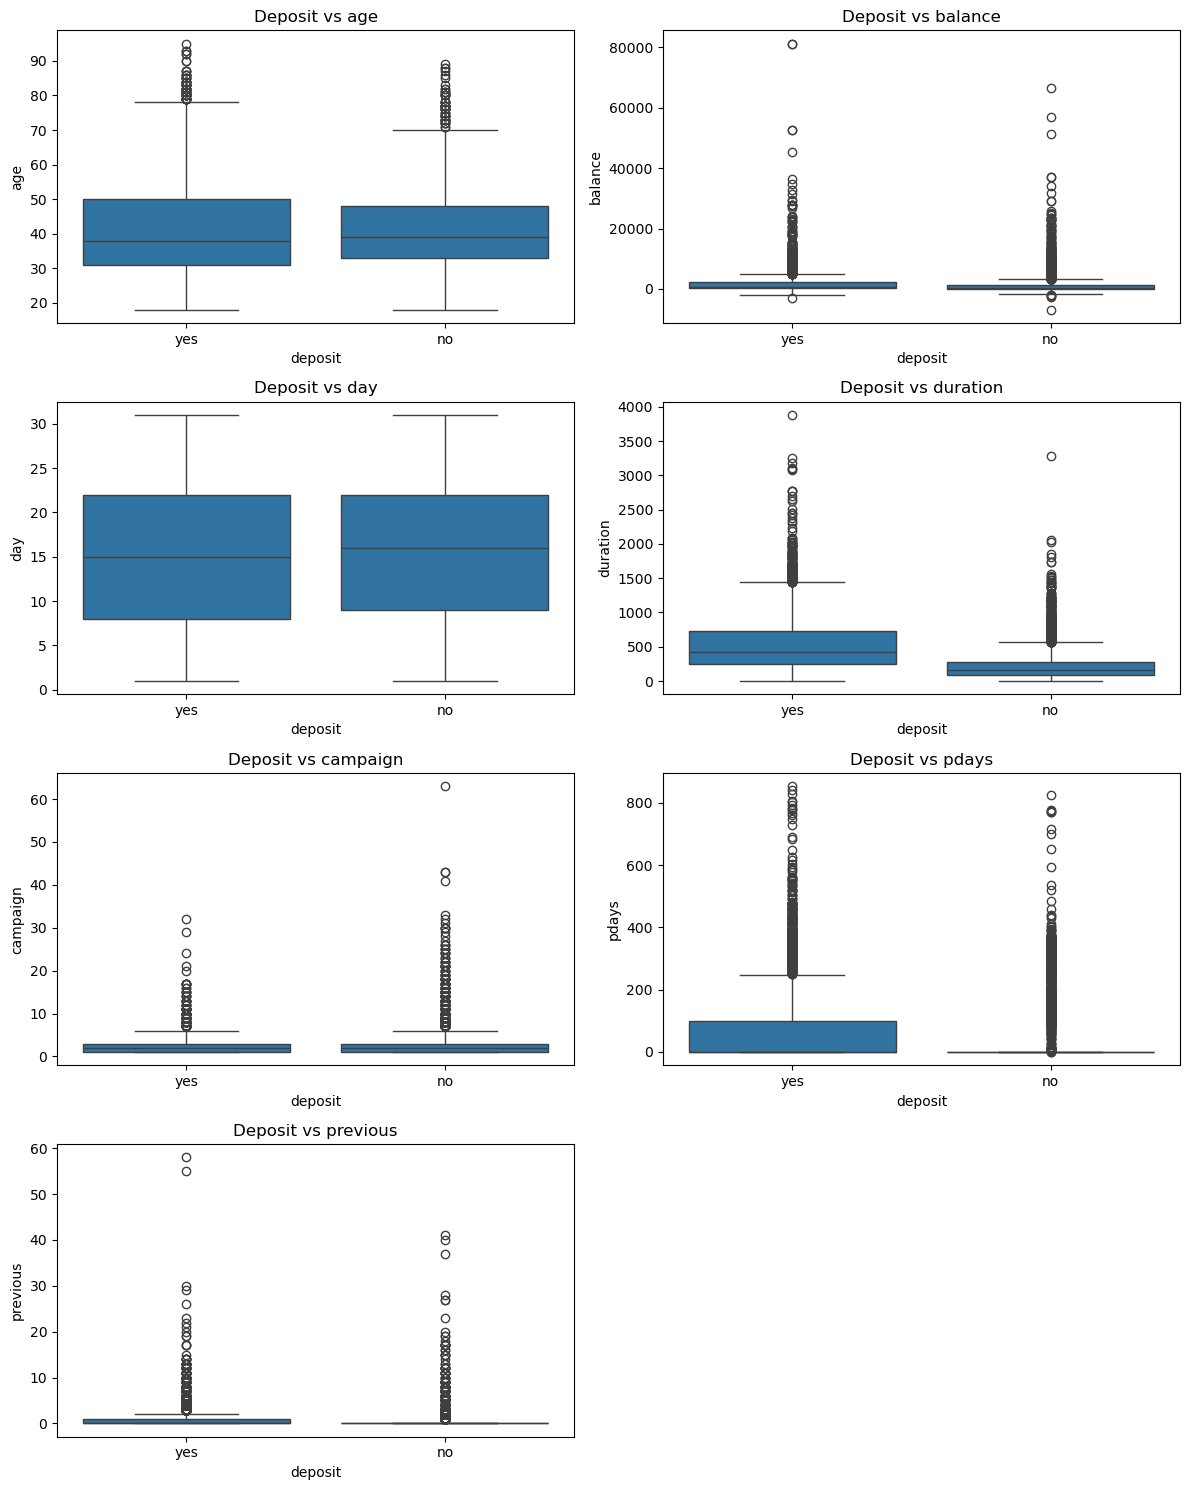

In [128]:
# Boxplots for Target(categorical) vs continuous columns

cont_col
plt.figure(figsize= [12,15])
n = 1
for col in cont_col:
    plt.subplot(4,2,n)
    sns.boxplot(x = 'deposit', y = col, data = df)
    plt.title("Deposit vs {}".format(col))
    n = n+1

plt.tight_layout()
plt.show()

In [129]:
# Key Insights :
# 'day' doesnot have much impact on the customer's decision.
# The distribution for Yes and No is very much same( marginal difference). 
# day is redundant w.r.t target.
# Drop the redundant column

# Duration of the call seems to have an impact on target as we can see with longer duration, the probability of the customer choosing Yes is higher. 


In [130]:
df.drop('day', axis = 1, inplace = True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

In [131]:
# update cont_col list by removing day
cont_col.remove('day')
cont_col

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

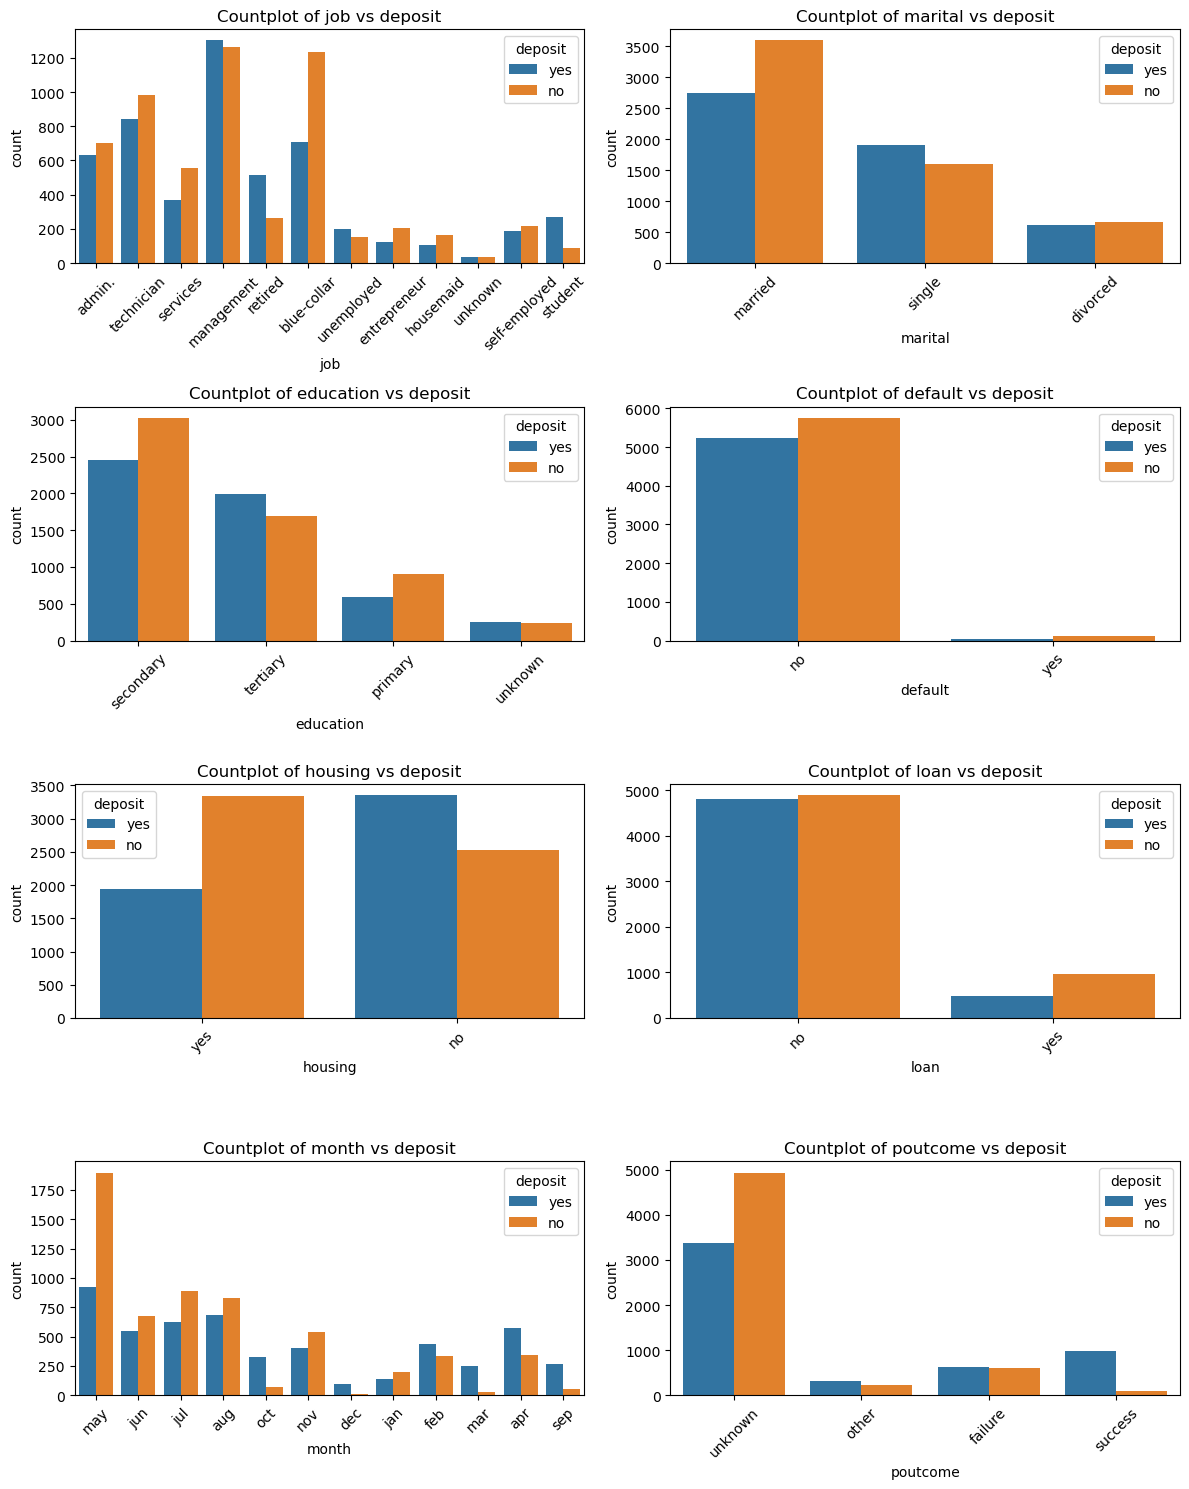

In [132]:
# Countplots of all categorical columns along with distribution w.r.t target

plt.figure(figsize = [12, 15])
n = 1
for col in category_col:
    plt.subplot(4,2,n)
    sns.countplot(x = col, hue = 'deposit', data = df)
    plt.title("Countplot of {} vs deposit".format(col))
    plt.xticks(rotation = 45)
    n = n+1

plt.tight_layout()
plt.show()

In [133]:
# Insight : 
# Month column does have some variations in distribution for yes/no. 
# May shows the highest count, while dec show the lowest
# But looking at the number of categories, keeping this column would not be necessary 
# as it will increase the dimension of the dataset after OneHotEncoding. And would reduce the processing of machine model.
# drop 'month'

In [134]:
df.drop('month', axis = 1, inplace = True)

In [135]:
# update category_col list. 
category_col.remove('month')
category_col

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

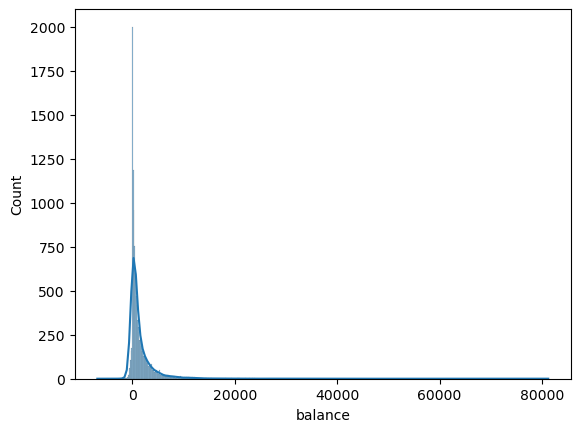

In [136]:
# Check the Balance distribution in the dataset, using a histplot

sns.histplot(df['balance'], kde = True)
plt.show()

In [137]:
# Insight :

# This is a positvely skewed chart. There is low population having higher balance. 

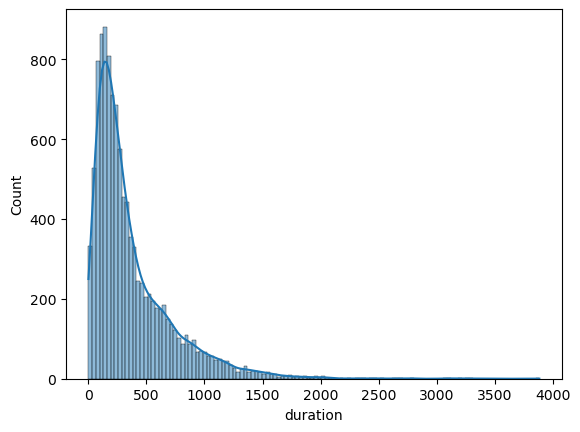

In [138]:
# Hitogram of Duration 
sns.histplot(df['duration'], kde = 'True')
plt.show()

In [139]:
# Insight :

# This is a positvely skewed chart. There is low population having long calls. Majority of population had call duration of upto 500s ec. 

# Numerical columns with Target analysis

In [140]:
# Identifying the correlation or patterns in numerical columns w.r.t Target column : Deposit

df_cont_col = df[cont_col] 
df_cont_col

,age,balance,duration,campaign,pdays,previous
0,59,2343,1042,1,-1,0
1,56,45,1467,1,-1,0
2,41,1270,1389,1,-1,0
3,55,2476,579,1,-1,0
4,54,184,673,2,-1,0
...,...,...,...,...,...,...
11157,33,1,257,1,-1,0
11158,39,733,83,4,-1,0
11159,32,29,156,2,-1,0
11160,43,0,9,2,172,5


In [141]:
df_cont_col = df[cont_col + ['deposit']]  # Passing ['deposit'] as a list to concatenate with list :num_col
df_cont_col

,age,balance,duration,campaign,pdays,previous,deposit
0,59,2343,1042,1,-1,0,yes
1,56,45,1467,1,-1,0,yes
2,41,1270,1389,1,-1,0,yes
3,55,2476,579,1,-1,0,yes
4,54,184,673,2,-1,0,yes
...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,no
11158,39,733,83,4,-1,0,no
11159,32,29,156,2,-1,0,no
11160,43,0,9,2,172,5,no


In [142]:
# Analyse the groupings of Target outputs : Yes and No
# Taking median instead of mean due to the presence of outliers. 

df_cont_col.groupby('deposit').median()

,age,balance,duration,campaign,pdays,previous
deposit,,,,,,
no,39.0,414.0,163.0,2.0,-1.0,0.0
yes,38.0,733.0,426.0,2.0,-1.0,0.0


In [143]:
# Insights : 

# balance and duration columns shows strong impact on deposit output. 

# Categorical columns w.r.t Target

## Data cleaning for Job Categories. Reducing the number of categories by groupings

In [144]:
# Job vs deposit.
# Find out the number of 'yes' deposit per category of Job.


In [145]:
# Find the individual categories of jobs in the dataset, along with number of occurrences. 

df['job'].value_counts()


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [146]:
# Data cleaning step . Correct the typo/font for admin role

df['job'] = df['job'].replace('admin.', 'admin')

In [147]:
# Make a list of all the jobs. 
# Though this step isn't necessary. 
# In 'for' loops, arrays can be passed because Numpy arrays behave like list in for loops. 


job_list = df['job'].unique().tolist()
job_list

['admin',
 'technician',
 'services',
 'management',
 'retired',
 'blue-collar',
 'unemployed',
 'entrepreneur',
 'housemaid',
 'unknown',
 'self-employed',
 'student']

In [148]:
# Using the for loop, filter the rows for each job category and condition of deposit 'yes'.

for j in job_list:
    print("{:20} -:- {:10}".format(j, len(df[(df.deposit == 'yes') & (df.job == j)])))


admin                -:-        631
technician           -:-        840
services             -:-        369
management           -:-       1301
retired              -:-        516
blue-collar          -:-        708
unemployed           -:-        202
entrepreneur         -:-        123
housemaid            -:-        109
unknown              -:-         34
self-employed        -:-        187
student              -:-        269


In [149]:
# Modify the for loop to display the job category, its count as well as percentage distibution 

for j in job_list:
    
    # find the total rows in df. To be used for percentage calculation. 
    total_df_counts = len(df)
    
    # filter the records with deposit (yes) in each job category( for each loop iteration)
    job_yes_count = len(df[(df.deposit == 'yes') & (df.job == j)])
    
    # percentage calculation
    job_yes_percent = (job_yes_count/total_df_counts) * 100

    #print the job category with count as well as percentage distribution
    print("{:20} -:- {:12} --:-- {:10.2f}%".format(j, job_yes_count, job_yes_percent))
  
    

admin                -:-          631 --:--       5.65%
technician           -:-          840 --:--       7.53%
services             -:-          369 --:--       3.31%
management           -:-         1301 --:--      11.66%
retired              -:-          516 --:--       4.62%
blue-collar          -:-          708 --:--       6.34%
unemployed           -:-          202 --:--       1.81%
entrepreneur         -:-          123 --:--       1.10%
housemaid            -:-          109 --:--       0.98%
unknown              -:-           34 --:--       0.30%
self-employed        -:-          187 --:--       1.68%
student              -:-          269 --:--       2.41%


In [150]:
# Since the job categories are too many. 
# If we simply continue for encoding(OneHotEncoding), this would increase the dimension of the dataframe too much. 
# Hence need to do some data cleaning and manipulation on this column by combining certain jobs into one categories.
# Following combinations can be done : 
# student + unknown + housemaid + unemployed  = low-income
# technician + services + admin   =   pink-collar
# self-employed + entrepreneur = small-business

df['job']  = df['job'].replace(['student', 'unknown', 'housemaid', 'unemployed'], 'low-income')
df['job'] = df['job'].replace(['technician', 'services', 'admin'],  'pink-collar')
df['job'] = df['job'].replace(['self-employed', 'entrepreneur'], 'small-business')

In [151]:
df.job.value_counts()

job
pink-collar       4080
management        2566
blue-collar       1944
low-income        1061
retired            778
small-business     733
Name: count, dtype: int64

## Data cleaning for education Categories. Reducing the number of categories by grouping unknown into tertiary. 

In [152]:
df.education.value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [153]:
df.education = df.education.replace(['tertiary', 'unknown'], 'tertiary')       

## Data cleaning for poutcome Categories. Reducing the number of categories by grouping 

In [154]:
df['poutcome'].value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [155]:
# Combine unknown and other as other
df['poutcome'] = df['poutcome'].replace('unknown' , 'other')

In [156]:
# Let's finally check the individual categories in each categorical column using a for loop implementation
n = 1
for col in category_col:
    print("Categories in")
    print(df[col].value_counts())
    print("  ")
     
    

Categories in
job
pink-collar       4080
management        2566
blue-collar       1944
low-income        1061
retired            778
small-business     733
Name: count, dtype: int64
  
Categories in
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
  
Categories in
education
secondary    5476
tertiary     4186
primary      1500
Name: count, dtype: int64
  
Categories in
default
no     10994
yes      168
Name: count, dtype: int64
  
Categories in
housing
no     5881
yes    5281
Name: count, dtype: int64
  
Categories in
loan
no     9702
yes    1460
Name: count, dtype: int64
  
Categories in
poutcome
other      8863
failure    1228
success    1071
Name: count, dtype: int64
  


# Data Pre-processing

## Encoding to convert categorical data into numerical

In [157]:
category_col

['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [158]:
# OneHotEncoding --job
# Label encoding -- marital , 'default', 'housing', 'loan', poutcome, deposit
# Ordinal encoding -- education

In [159]:
df = pd.get_dummies(df, columns = ['job'])

In [160]:
df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,job_blue-collar,job_low-income,job_management,job_pink-collar,job_retired,job_small-business
0,59,married,secondary,no,2343,yes,no,1042,1,-1,0,other,yes,False,False,False,True,False,False
1,56,married,secondary,no,45,no,no,1467,1,-1,0,other,yes,False,False,False,True,False,False
2,41,married,secondary,no,1270,yes,no,1389,1,-1,0,other,yes,False,False,False,True,False,False
3,55,married,secondary,no,2476,yes,no,579,1,-1,0,other,yes,False,False,False,True,False,False
4,54,married,tertiary,no,184,no,no,673,2,-1,0,other,yes,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,single,primary,no,1,yes,no,257,1,-1,0,other,no,True,False,False,False,False,False
11158,39,married,secondary,no,733,no,no,83,4,-1,0,other,no,False,False,False,True,False,False
11159,32,single,secondary,no,29,no,no,156,2,-1,0,other,no,False,False,False,True,False,False
11160,43,married,secondary,no,0,no,yes,9,2,172,5,failure,no,False,False,False,True,False,False


In [161]:
le = LabelEncoder()
df.marital = le.fit_transform(df.marital)

In [162]:
df.default = le.fit_transform(df.default)
df.housing = le.fit_transform(df.housing)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)

In [163]:
df.deposit = le.fit_transform(df.deposit)

In [164]:
edu_rank = [['primary', 'secondary', 'tertiary']]
ord_encod = OrdinalEncoder(categories = edu_rank)
df.education = ord_encod.fit_transform(df[['education']])
     

In [165]:
df.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,job_blue-collar,job_low-income,job_management,job_pink-collar,job_retired,job_small-business
0,59,1,1.0,0,2343,1,0,1042,1,-1,0,1,1,False,False,False,True,False,False
1,56,1,1.0,0,45,0,0,1467,1,-1,0,1,1,False,False,False,True,False,False
2,41,1,1.0,0,1270,1,0,1389,1,-1,0,1,1,False,False,False,True,False,False
3,55,1,1.0,0,2476,1,0,579,1,-1,0,1,1,False,False,False,True,False,False
4,54,1,2.0,0,184,0,0,673,2,-1,0,1,1,False,False,False,True,False,False


In [166]:
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit',
       'job_blue-collar', 'job_low-income', 'job_management',
       'job_pink-collar', 'job_retired', 'job_small-business'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 11162 non-null  int64  
 1   marital             11162 non-null  int32  
 2   education           11162 non-null  float64
 3   default             11162 non-null  int32  
 4   balance             11162 non-null  int64  
 5   housing             11162 non-null  int32  
 6   loan                11162 non-null  int32  
 7   duration            11162 non-null  int64  
 8   campaign            11162 non-null  int64  
 9   pdays               11162 non-null  int64  
 10  previous            11162 non-null  int64  
 11  poutcome            11162 non-null  int32  
 12  deposit             11162 non-null  int32  
 13  job_blue-collar     11162 non-null  bool   
 14  job_low-income      11162 non-null  bool   
 15  job_management      11162 non-null  bool   
 16  job_

In [168]:
# Drop job_low-income column. since jobs are oneHot Encoded, one of the encoded columns can be dropped out

df.drop('job_low-income', axis = 1, inplace = True)

In [169]:
# Converting all the datatypes into int

df = df.astype('int')

In [170]:
df.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,job_blue-collar,job_management,job_pink-collar,job_retired,job_small-business
0,59,1,1,0,2343,1,0,1042,1,-1,0,1,1,0,0,1,0,0
1,56,1,1,0,45,0,0,1467,1,-1,0,1,1,0,0,1,0,0
2,41,1,1,0,1270,1,0,1389,1,-1,0,1,1,0,0,1,0,0
3,55,1,1,0,2476,1,0,579,1,-1,0,1,1,0,0,1,0,0
4,54,1,2,0,184,0,0,673,2,-1,0,1,1,0,0,1,0,0


## Handling the numerical column

In [171]:
# pdays == -1 needs to be handled as the business meaning of -1 is different here. 
# to keep the business meaning unaffected, replace pdays with some very big unrealistic number 

df.loc[df['pdays'] == -1, 'pdays'] = 100000

In [172]:
df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,job_blue-collar,job_management,job_pink-collar,job_retired,job_small-business
0,59,1,1,0,2343,1,0,1042,1,100000,0,1,1,0,0,1,0,0
1,56,1,1,0,45,0,0,1467,1,100000,0,1,1,0,0,1,0,0
2,41,1,1,0,1270,1,0,1389,1,100000,0,1,1,0,0,1,0,0
3,55,1,1,0,2476,1,0,579,1,100000,0,1,1,0,0,1,0,0
4,54,1,2,0,184,0,0,673,2,100000,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,1,1,0,257,1,100000,0,1,0,1,0,0,0,0
11158,39,1,1,0,733,0,0,83,4,100000,0,1,0,0,0,1,0,0
11159,32,2,1,0,29,0,0,156,2,100000,0,1,0,0,0,1,0,0
11160,43,1,1,0,0,0,1,9,2,172,5,0,0,0,0,1,0,0


In [173]:
df.pdays.value_counts()

pdays
100000    8324
92         106
182         89
91          84
181         81
          ... 
437          1
728          1
518          1
828          1
118          1
Name: count, Length: 472, dtype: int64

In [174]:
# do the reciprocal of pdays, so all the numbers can fit in a  reasonable scale
# reducing the impact of large numbers is necessary
# there is no '0' value for pdays, hence reciprocal can be done easily

df['scaled_pdays'] = np.where(df['pdays'], 1/df['pdays'], 1/df['pdays'])

In [175]:
df

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,job_blue-collar,job_management,job_pink-collar,job_retired,job_small-business,scaled_pdays
0,59,1,1,0,2343,1,0,1042,1,100000,0,1,1,0,0,1,0,0,0.000010
1,56,1,1,0,45,0,0,1467,1,100000,0,1,1,0,0,1,0,0,0.000010
2,41,1,1,0,1270,1,0,1389,1,100000,0,1,1,0,0,1,0,0,0.000010
3,55,1,1,0,2476,1,0,579,1,100000,0,1,1,0,0,1,0,0,0.000010
4,54,1,2,0,184,0,0,673,2,100000,0,1,1,0,0,1,0,0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,1,1,0,257,1,100000,0,1,0,1,0,0,0,0,0.000010
11158,39,1,1,0,733,0,0,83,4,100000,0,1,0,0,0,1,0,0,0.000010
11159,32,2,1,0,29,0,0,156,2,100000,0,1,0,0,0,1,0,0,0.000010
11160,43,1,1,0,0,0,1,9,2,172,5,0,0,0,0,1,0,0,0.005814


In [176]:
# Now drop pdays
df.drop('pdays', axis = 1, inplace = True)

In [177]:
df

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,deposit,job_blue-collar,job_management,job_pink-collar,job_retired,job_small-business,scaled_pdays
0,59,1,1,0,2343,1,0,1042,1,0,1,1,0,0,1,0,0,0.000010
1,56,1,1,0,45,0,0,1467,1,0,1,1,0,0,1,0,0,0.000010
2,41,1,1,0,1270,1,0,1389,1,0,1,1,0,0,1,0,0,0.000010
3,55,1,1,0,2476,1,0,579,1,0,1,1,0,0,1,0,0,0.000010
4,54,1,2,0,184,0,0,673,2,0,1,1,0,0,1,0,0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,1,1,0,257,1,0,1,0,1,0,0,0,0,0.000010
11158,39,1,1,0,733,0,0,83,4,0,1,0,0,0,1,0,0,0.000010
11159,32,2,1,0,29,0,0,156,2,0,1,0,0,0,1,0,0,0.000010
11160,43,1,1,0,0,0,1,9,2,5,0,0,0,0,1,0,0,0.005814


## Train-test split 

In [178]:
# Split features and target

X = df.drop(columns = 'deposit')
y = df.deposit

In [179]:
X

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,job_blue-collar,job_management,job_pink-collar,job_retired,job_small-business,scaled_pdays
0,59,1,1,0,2343,1,0,1042,1,0,1,0,0,1,0,0,0.000010
1,56,1,1,0,45,0,0,1467,1,0,1,0,0,1,0,0,0.000010
2,41,1,1,0,1270,1,0,1389,1,0,1,0,0,1,0,0,0.000010
3,55,1,1,0,2476,1,0,579,1,0,1,0,0,1,0,0,0.000010
4,54,1,2,0,184,0,0,673,2,0,1,0,0,1,0,0,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,2,0,0,1,1,0,257,1,0,1,1,0,0,0,0,0.000010
11158,39,1,1,0,733,0,0,83,4,0,1,0,0,1,0,0,0.000010
11159,32,2,1,0,29,0,0,156,2,0,1,0,0,1,0,0,0.000010
11160,43,1,1,0,0,0,1,9,2,5,0,0,0,1,0,0,0.005814


In [180]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

## Standardization / scaling numerical features

In [181]:
sc = StandardScaler()
X = sc.fit_transform(X)


In [182]:
X

array([[ 1.49150488, -0.31867191, -0.35812526, ..., -0.27372058,
        -0.26511277, -0.09927568],
       [ 1.23967567, -0.31867191, -0.35812526, ..., -0.27372058,
        -0.26511277, -0.09927568],
       [-0.0194704 , -0.31867191, -0.35812526, ..., -0.27372058,
        -0.26511277, -0.09927568],
       ...,
       [-0.77495804,  1.27998692, -0.35812526, ..., -0.27372058,
        -0.26511277, -0.09927568],
       [ 0.14841574, -0.31867191, -0.35812526, ..., -0.27372058,
        -0.26511277,  0.08983023],
       [-0.6070719 , -0.31867191, -0.35812526, ..., -0.27372058,
        -0.26511277, -0.09927568]])

In [183]:
# Train - Test split ( 80 - 20 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [184]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8929, 17), (2233, 17), (8929,), (2233,))

# Importing Libraries for model building and evaluation

## Fit models and evaluate the metrices to compare and find the best options 

## Comparing multiple models by iterating through the loop

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
models = []  #  Empty list to store the models

models.append(('Logistic Regression', LogisticRegression(random_state = 42)))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma = 'auto', random_state = 42)))
models.append(('Naive Bayes', GaussianNB()))  # GaussianNB doesn't have random_state parameter
models.append(('K Neighbors', KNeighborsClassifier()))  # K Neighbors doesn't have random_state parameter
models.append(('XG Boost', XGBClassifier(random_state = 42)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state = 42)))

results = []  # Stores evaluation metrics
name = []  # Stores names of the models

## Calculating the Accuracy score for all models

In [187]:
# Fit all the models and calculate the accuracy score  in a for loop
# Predicting the accuracy score before actually building the model. 
# Early predictions will help us to decide the best model to choose

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # prediction done using the X test data
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy_{} : {}".format(name, accuracy))

Accuracy_Logistic Regression : 0.7778772951186744
Accuracy_CART : 0.7501119570085087
Accuracy_Random Forest : 0.8011643528884909
Accuracy_SVM : 0.8047469771607703
Accuracy_Naive Bayes : 0.7442901925660547
Accuracy_K Neighbors : 0.7653381101656964
Accuracy_XG Boost : 0.7971339005821765
Accuracy_Gradient Boost : 0.8042991491267353


## Calculating the precision score for all models

In [188]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_pred, y_test)
    print("Precision_{} : {}".format(name, precision))

Precision_Logistic Regression : 0.7366447985004686
Precision_CART : 0.7403936269915652
Precision_Random Forest : 0.8134957825679475
Precision_SVM : 0.8106841611996252
Precision_Naive Bayes : 0.6504217432052484
Precision_K Neighbors : 0.7385192127460168
Precision_XG Boost : 0.8050609184629803
Precision_Gradient Boost : 0.8088097469540768


## Calculating the recall score for all models

In [189]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_pred, y_test)
    print("Recall_{} : {}".format(name, recall))

Recall_Logistic Regression : 0.7852147852147852
Recall_CART : 0.7376283846872083
Recall_Random Forest : 0.779874213836478
Recall_SVM : 0.7870791628753412
Recall_Naive Bayes : 0.7780269058295964
Recall_K Neighbors : 0.7628267182962246
Recall_XG Boost : 0.7780797101449275
Recall_Gradient Boost : 0.7874087591240876


## Calculating the f1 score for all models

In [190]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    print("F1_{} ; {}".format(name, f1))

F1_Logistic Regression ; 0.7601547388781431
F1_CART ; 0.7390084190832554
F1_Random Forest ; 0.7963302752293578
F1_SVM ; 0.7987072945521699
F1_Naive Bayes ; 0.7085247575293517
F1_K Neighbors ; 0.7504761904761905
F1_XG Boost ; 0.7913403961308153
F1_Gradient Boost ; 0.7979657882570504


## Calculating the confusion matrix for all models

In [191]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confusion = confusion_matrix(y_pred, y_test)
    print("Conf_Matrix_{} : ".format(name))
    print("{}".format(confusion))
    print("    ")

Conf_Matrix_Logistic Regression : 
[[951 281]
 [215 786]]
    
Conf_Matrix_CART : 
[[885 277]
 [281 790]]
    
Conf_Matrix_Random Forest : 
[[921 199]
 [245 868]]
    
Conf_Matrix_SVM : 
[[932 202]
 [234 865]]
    
Conf_Matrix_Naive Bayes : 
[[968 373]
 [198 694]]
    
Conf_Matrix_K Neighbors : 
[[921 279]
 [245 788]]
    
Conf_Matrix_XG Boost : 
[[921 208]
 [245 859]]
    
Conf_Matrix_Gradient Boost : 
[[933 204]
 [233 863]]
    


# Key Insights 

In [192]:
# Compare the metrics (accuracy, precision, recall, f1 scores and confusion matrix) for all models
# Random Forest model looks best performing. 


## Implementing Random Forst Model

In [193]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


# Check the accuracy of model on training data

train_score = rf.score(X_train, y_train)

# Check the accuracy of the model on test data

test_score = rf.score(X_test, y_test)

print("Train Score is {}".format(train_score))
print("Test Score is {}".format(test_score))


Train Score is 1.0
Test Score is 0.8029556650246306


In [194]:
# Train Score is significantly higher than Test Score -- Overfitting model. 
# Model needs to be retuned by lowering n_estimators. 

In [195]:
rf1 = RandomForestClassifier(n_estimators = 100, random_state =40)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

train_score = rf1.score(X_train, y_train)

test_score = rf1.score(X_test, y_test)

print("Train Score is {}".format(train_score))
print("Test Score is {}".format(test_score))


Train Score is 1.0
Test Score is 0.799373040752351


In [196]:
# Reduce n_estimators further to improve model tuning.

rf1 = RandomForestClassifier(n_estimators = 50, random_state =40)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

train_score = rf1.score(X_train, y_train)

test_score = rf1.score(X_test, y_test)

print("Train Score is {}".format(train_score))
print("Test Score is {}".format(test_score))


Train Score is 0.9995520215029678
Test Score is 0.7975817286162113


In [197]:
# Reduce n_estimators further to improve model tuning.

rf1 = RandomForestClassifier(n_estimators = 25, random_state =40)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

train_score = rf1.score(X_train, y_train)

test_score = rf1.score(X_test, y_test)

print("Train Score is {}".format(train_score))
print("Test Score is {}".format(test_score))


Train Score is 0.9978721021390973
Test Score is 0.7984773846842812


# Model is still over fitted. 

## Use hyper parameter tuning
## Use Cross Validation 

In [198]:
from sklearn.model_selection import cross_val_score

rf1_crossval_train = cross_val_score(estimator = rf1, X = X_train, y = y_train, cv = 10)

rf1_crossval_train.mean()

0.811289350654568

In [199]:
rf1_crossval_test = cross_val_score(estimator = rf1, X = X_test, y = y_test, cv = 10)

rf1_crossval_test.mean()

0.7958119795003202

In [200]:
rf1_crossval_y_pred = rf1.predict(X_test)

In [201]:
# Print the metrics for rf1 model

rf1_crossval_accuracy = accuracy_score(y_test, rf1_crossval_y_pred)
rf1_crossval_precision = precision_score(y_test, rf1_crossval_y_pred)
rf1_crossval_recall = recall_score(y_test, rf1_crossval_y_pred)
rf1_crossval_f1 = f1_score(y_test, rf1_crossval_y_pred)
rf1_crossval_conf_matrix = confusion_matrix(y_test, rf1_crossval_y_pred)


print("Accuracy score is {}".format(rf1_crossval_accuracy))
print("Precision score is {}".format(rf1_crossval_precision))
print("Recall score is {}".format(rf1_crossval_recall))
print("F1 score is {}".format(rf1_crossval_f1))
print("Confusion matrix score is ")
print("{}".format(rf1_crossval_conf_matrix))

Accuracy score is 0.7984773846842812
Precision score is 0.779185520361991
Recall score is 0.8069353327085286
F1 score is 0.7928176795580111
Confusion matrix score is 
[[922 244]
 [206 861]]
